<a href="https://colab.research.google.com/github/eugenie-kim012/Daily-Log/blob/main/Quest_5_%EB%8D%B0%EC%8B%B84%EA%B8%B0_%ED%9A%8C%EA%B7%80_%EC%A7%91%EA%B0%92%EC%98%88%EC%B8%A1V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 캐글 참여 링크

https://www.kaggle.com/t/05f287fe67bb43298d8c3e66a1e71c27

# House Prices 🏠

# 데이터 이해 및 탐색

# 1. 각 피처에 대한 이해가 명확한가?
# 2. 데이터의 분포와 특성을 파악하기 위한 적절한 시각화가 이루어졌는가?
# 3. 데이터에서 유의미한 인사이트를 도출하였는가 (심화)?

In [206]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('train.csv')
#데이터 가공을 많이 수행할 예정이므로, 원본 csv 파일 기반의 DataFrame은 보관하고 복사해서 데이터를 가공
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000




## [데이터 Shape 및 NULL 확인]

In [207]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1168, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
Name: count, dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1162
MiscFeature     1120
Alley           1098
Fence            941
MasVnrType       694
FireplaceQu      545
LotFrontage      218
GarageType        69
GarageYrBlt       69
GarageFinish      69
GarageQual        69
GarageCond        69
BsmtExposure      24
BsmtFinType2      24
BsmtQual          23
BsmtCond          23
BsmtFinType1      23
MasVnrArea         8
Electrical         1
dtype: int64


# [타깃값 (Price)가 정규 분포인지 확인하기
* 주택 가격은 분포가 비대칭적이고 이상치(고가 주택)가 존재할 수 있어, 가격 차이가 큰 경우 모델 학습 시 왜곡이 발생의 가능성이 있음. 이를 완화하기 위해 주택 가격에 로그 변환을 적용하여 분포를 정규화.

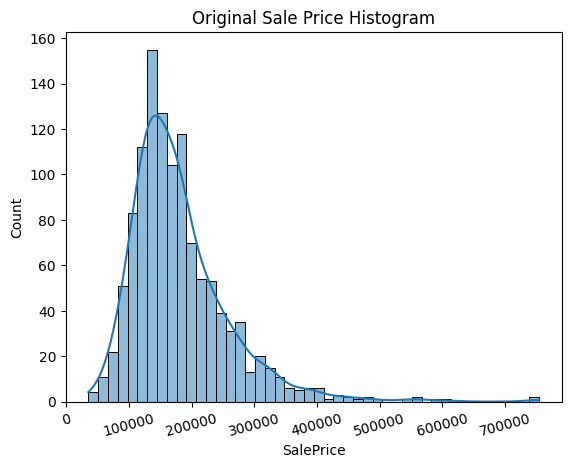

In [208]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

# [로그 변환 (Log Transformation)]

* # log1p() 한 값으로 visualisation -> 정규 분포 형태로 분포하고 있다는 것을 확인하였음
* 로그 변환한 결괎값을 기반으로 학습한 뒤, 예측 시에는 다시 결괏값을 expm1()으로 반환

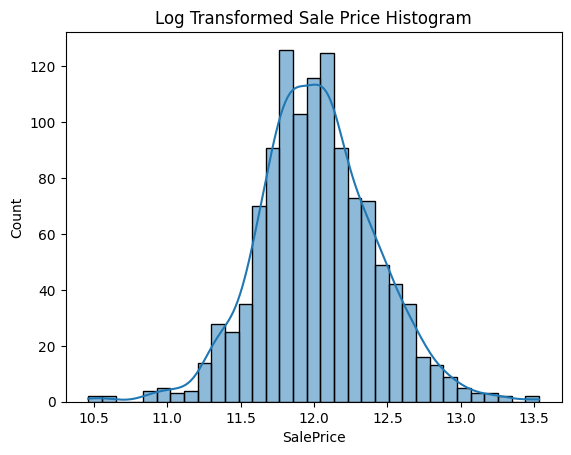

In [209]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

# 데이터 전처리 과정

## 1. 결측치 처리, 이상치 처리 등 데이터 정제가 적절하게 수행되었는가?
## 2. 데이터 스케일링 및 인코딩 등이 적절히 수행되었는가?
## 3. 피쳐 엔지니어링 (파생 변수)이 적절하고 창의적으로 이루어졌는가 (심화)?

#[로그 변환 및 결측치 처리]
* 문자형인 경우 그대로 둠 (원 핫 인코딩)

In [210]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice']) #오리지널과 별개로 로그 변환 시킨 SalePrice 칼럼 만들고 정리

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
# Masonry veneer type"은 주택 외벽 마감재의 종류를 의미하는 항목으로, 주택 가격 예측에서 중요할 수 있는 변수
# LotFrontage는 주택 데이터에서 매우 자주 등장하는 변수 중 하나로, 건물 진입성, 가시성, 입지 가치를 반영하는 중요한 변수임
# PoolQC - Pool quality
# MiscFeature - Miscellaneous feature not covered in other categories
# Alley - Type of alley access
# Fence - Fence quality
# FireplaceQu -  Fireplace quality

house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)

# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체
# house_df.fillna(house_df.mean(),inplace=True) - 컬럼별 mean 값을 구하여 각 NULL 값에 대체하여 주는 함수
num_cols = house_df.select_dtypes(include=['number']).columns
#house_df라는 주택 데이터프레임에서 수치형(numeric) 데이터 타입을 가진 컬럼들만 선택해서 그 컬럼 이름만 추출합니다.
house_df[num_cols] = house_df[num_cols].fillna(house_df[num_cols].mean())
# house_df[num_cols].mean()은 각 수치형 컬럼의 평균값을 계산한 Series입니다.
# .fillna(Series)는 각 컬럼별로 해당하는 평균값으로 NaN만 채웁니다 -> 결측값만 채우는 함수임
# NaN이 아닌 값은 그대로 유지됩니다.

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [211]:
house_df.shape

(1168, 75)

In [212]:
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))


Null 컬럼과 그 건수:
  MasVnrType      694
GarageQual       69
GarageCond       69
GarageFinish     69
GarageType       69
BsmtFinType2     24
BsmtExposure     24
BsmtCond         23
BsmtQual         23
BsmtFinType1     23
Electrical        1
dtype: int64


In [213]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df) #원 - 핫 인코딩을 마친 파일 명을 알아두기
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1168, 75)
get_dummies() 수행 후 데이터 Shape: (1168, 267)
## Null 피처의 Type :
 Series([], dtype: object)


# 모델 선택 및 비교

## 1. 최소 3개 이상의 모델을 비교하고 있는가?
## 2. 모델 선택 이유와 각 모델의 특성을 잘 설명하였는가?
## 3. 앙상블 (모델 3개) 방법을 사용하여, 성능을 비교하였는가 (심화)?

## [선형 회귀 모델 학습/ 예측 평가]

* RMSLE는 실제 값과 예측값의 오류를 로그 변환한 뒤 RMSE를 적용한 값임
* 이에 이미 로그 변환을 진행하였으므로 선형 회귀 모델 학습 후 이를 명시하여 줄 것

In [214]:
def get_rmse(model):
    pred = model.predict(X_test)
    pred_exp = np.expm1(pred)
    mse = mean_squared_error(np.expm1(y_test) , pred_exp)
    mse2 = mean_squared_error(y_test , pred)
    rmse0 = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(np.sqrt(mse2), 3)))
    print('{0} 로그 변환된 MSE: {1}'.format(model.__class__.__name__,np.round(mse2, 3)))

    print('{0} 로그 변환해제 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse0, 3)))
    print('{0} 로그 변환해제 MSE: {1}'.format(model.__class__.__name__,np.round(mse, 3)))

    return rmse0

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

* # [선형 회귀 모델 돌리기]

In [215]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice'] #원-핫 인코딩을 마친 파일 이름이 house_df_ohe, 여기서 SalePrice를 ML의 Target으로 삼는다는 말
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) #위에서 정의한 함수

LinearRegression 로그 변환된 RMSE: 0.131
LinearRegression 로그 변환된 MSE: 0.017
LinearRegression 로그 변환해제 RMSE: 21295.906
LinearRegression 로그 변환해제 MSE: 453515626.704
Ridge 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 MSE: 0.018
Ridge 로그 변환해제 RMSE: 22584.92
Ridge 로그 변환해제 MSE: 510078620.219
Lasso 로그 변환된 RMSE: 0.177
Lasso 로그 변환된 MSE: 0.031
Lasso 로그 변환해제 RMSE: 33922.99
Lasso 로그 변환해제 MSE: 1150769232.347


[np.float64(21295.906336752076),
 np.float64(22584.920195102928),
 np.float64(33922.98973184962)]

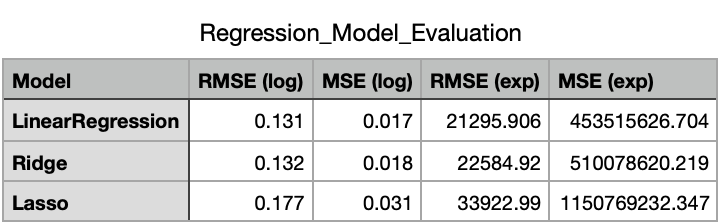

# * 라쏘 모델의 경우 회귀 성능이 다른 모델에 비해 떨어짐 (파라미터 튜닝이 필요)
* 교과서와 달리 라쏘 모델 성능이 비교적 좋게 나옴

## [선형 회귀 모델 학습하기 ]

In [216]:
#def 를 사용, 함수를 만드는 과정
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    # 회귀 계수(coef_)를 기반으로 Series 생성 (컬럼명과 매핑)
    coef = pd.Series(model.coef_, index=X_features.columns)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

In [217]:
#함수 및 영향력 출력하기 (이 경우 linear Regression에 대한 영향력이 나옴)
high, low = get_top_bottom_coef(lr_reg)
print("가장 영향력이 큰 변수 10개:\n", high)
print("가장 영향력이 작은 변수 10개:\n", low)

가장 영향력이 큰 변수 10개:
 RoofMatl_Metal      0.706273
RoofMatl_Tar&Grv    0.413439
GarageQual_Ex       0.336583
Condition2_PosA     0.285354
RoofMatl_CompShg    0.273841
RoofMatl_WdShngl    0.251580
RoofMatl_Roll       0.234035
MSZoning_FV         0.222207
RoofMatl_WdShake    0.195714
MSZoning_RL         0.177097
dtype: float64
가장 영향력이 작은 변수 10개:
 LandSlope_Sev          -0.124964
Neighborhood_MeadowV   -0.129374
RoofStyle_Flat         -0.139546
GarageQual_Po          -0.153099
Functional_Maj2        -0.204381
Foundation_Wood        -0.228229
Exterior1st_BrkComm    -0.393591
MSZoning_C (all)       -0.582310
Condition2_PosN        -0.665428
RoofMatl_ClyTile       -2.074882
dtype: float64


In [218]:
#함수 및 영향력 출력하기
high, low = get_top_bottom_coef(ridge_reg)
print("가장 영향력이 큰 변수 10개:\n", high)
print("가장 영향력이 작은 변수 10개:\n", low)

가장 영향력이 큰 변수 10개:
 MSZoning_FV             0.171105
RoofMatl_WdShngl        0.157786
Neighborhood_StoneBr    0.150643
RoofMatl_CompShg        0.142813
MSZoning_RL             0.133389
Condition2_Norm         0.127705
Neighborhood_NridgHt    0.125960
Neighborhood_Crawfor    0.120604
RoofMatl_Metal          0.114333
Condition2_PosA         0.112667
dtype: float64
가장 영향력이 작은 변수 10개:
 GarageQual_Fa          -0.076191
Exterior2nd_Brk Cmn    -0.083751
Neighborhood_MeadowV   -0.096398
Foundation_Wood        -0.096701
Functional_Maj2        -0.101071
Neighborhood_Edwards   -0.113304
Exterior1st_BrkComm    -0.123190
Condition2_PosN        -0.272188
MSZoning_C (all)       -0.411426
RoofMatl_ClyTile       -0.572972
dtype: float64


In [219]:
#함수 및 영향력 출력하기 (이 경우 linear Regression에 대한 영향력이 나옴)
high, low = get_top_bottom_coef(lasso_reg)
print("가장 영향력이 큰 변수 10개:\n", high)
print("가장 영향력이 작은 변수 10개:\n", low)

가장 영향력이 큰 변수 10개:
 YearBuilt       2.376735e-03
YearRemodAdd    1.598135e-03
GarageArea      3.940158e-04
GrLivArea       3.239847e-04
ScreenPorch     2.537229e-04
WoodDeckSF      1.870494e-04
TotalBsmtSF     9.872363e-05
MasVnrArea      4.698982e-05
BsmtFinSF1      3.444404e-05
LotArea         3.910357e-07
dtype: float64
가장 영향력이 작은 변수 10개:
 Condition1_RRNn     0.000000
Condition1_RRNe    -0.000000
Condition1_RRAn     0.000000
Condition1_RRAe    -0.000000
Condition1_PosN    -0.000000
Condition1_PosA     0.000000
Condition1_Norm     0.000000
Condition2_Feedr   -0.000000
MiscVal            -0.000017
PoolArea           -0.000084
dtype: float64


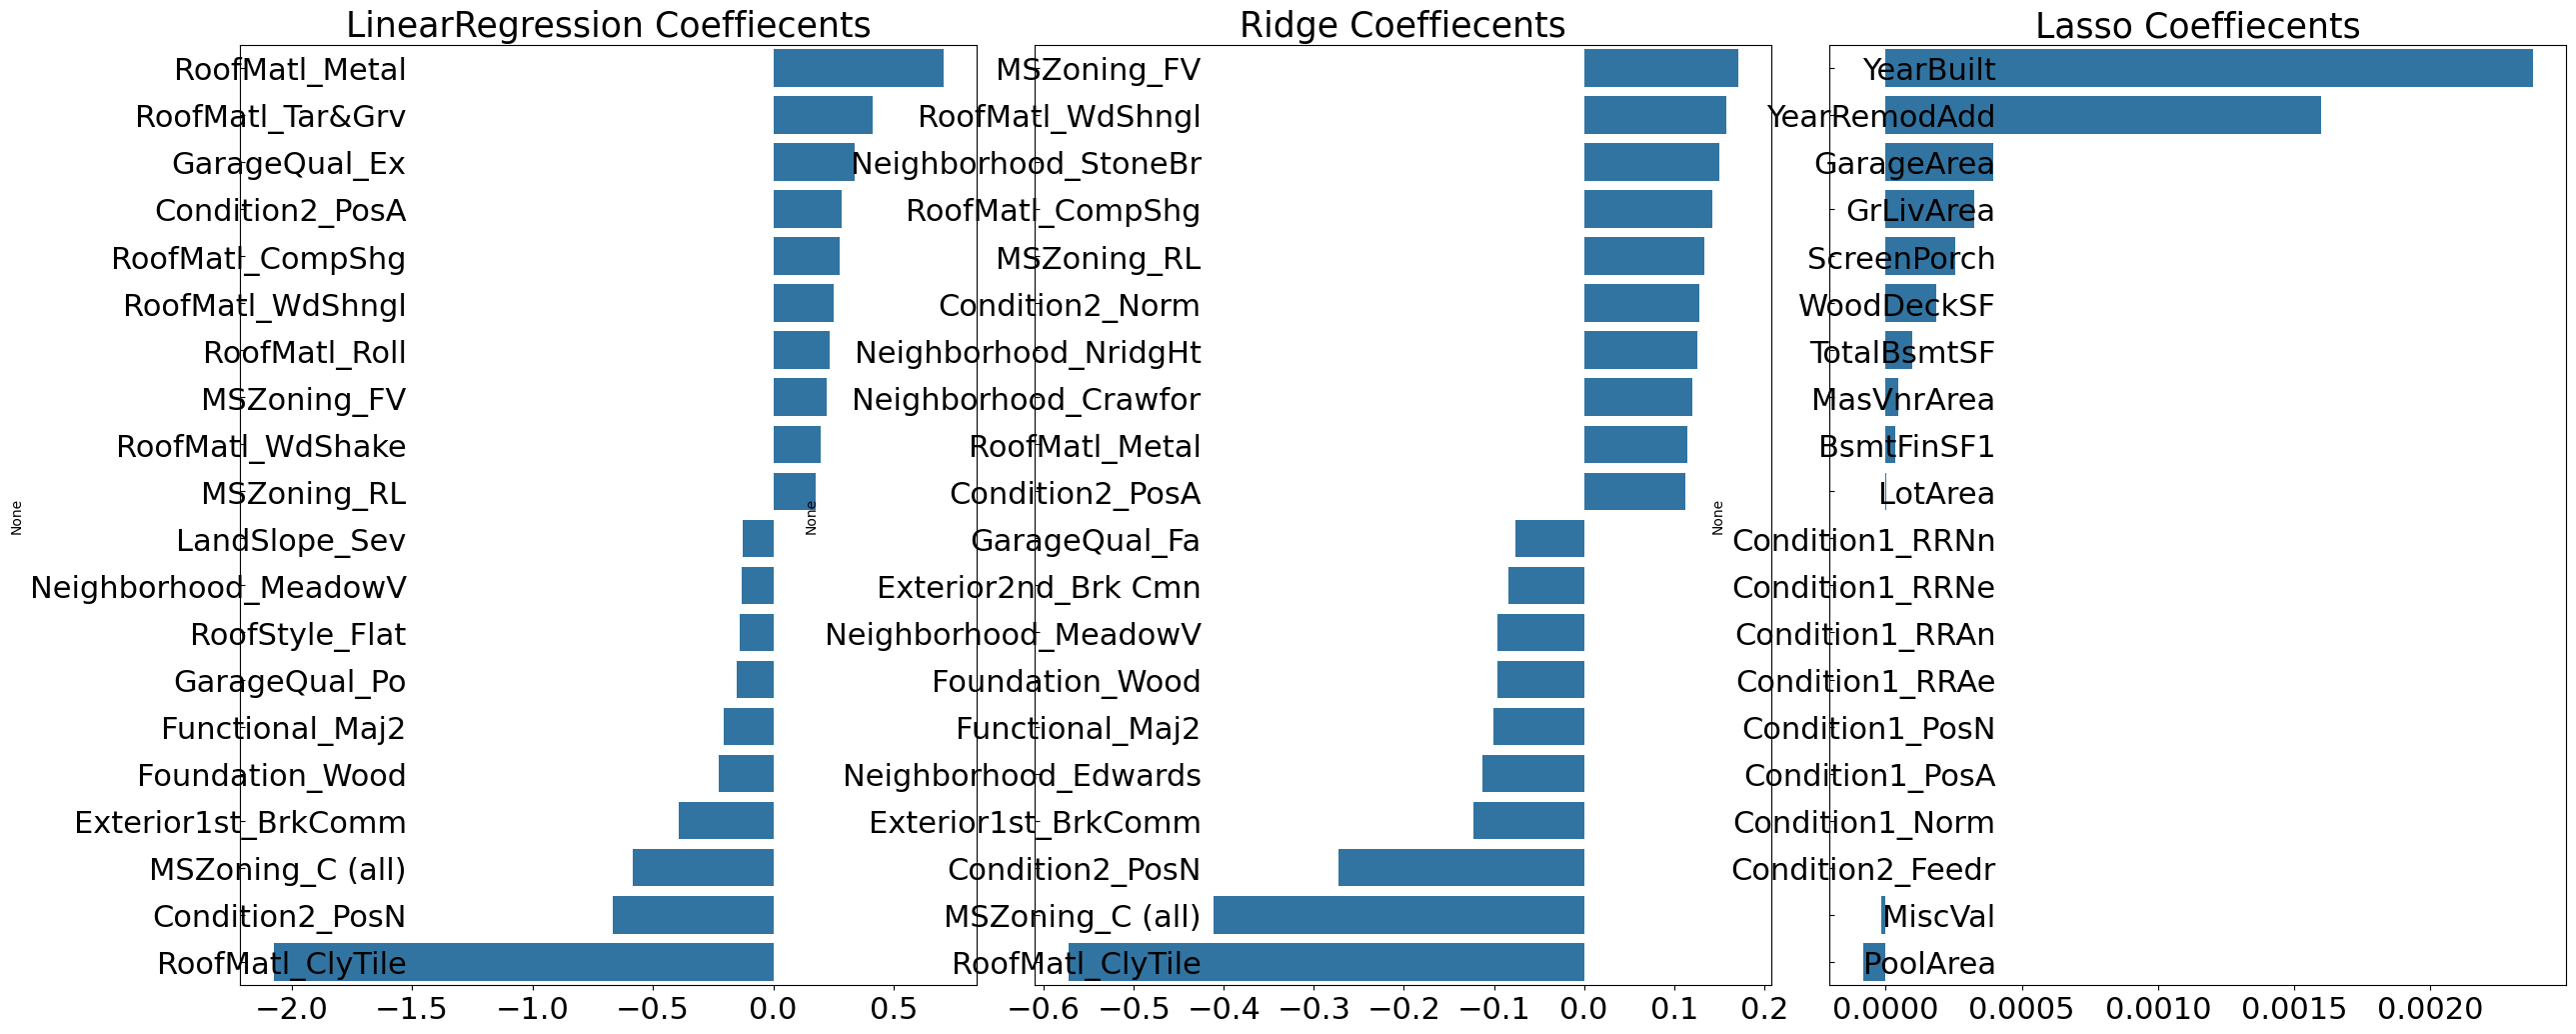

In [220]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout()

    for i_num, model in enumerate(models): # models 리스트의 각 회귀 모델을 순차적으로 반복
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model)  # 모델의 회귀 계수 중 상위 10개, 하위 10개 변수 추출
        coef_concat = pd.concat( [coef_high , coef_low] ) # 두 시리즈를 위아래로 이어붙여 총 20개 변수로 구성된 시리즈 생성
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)  # subplot 제목을 모델 이름으로 설정
        axs[i_num].tick_params(axis="y",direction="in", pad=-120) # y축 tick 방향 및 간격 조정 (글자 위치 안쪽으로 붙이기)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()): # x축과 y축의 tick label 모두 가져오기
            label.set_fontsize(22) # tick label의 폰트 크기 크게 설정
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])


# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

## 이번에는 학습과 테스트 데이터 세트를 구분하지 않고 (train_test_split()) 전체 데이터 세트인 x_feactures 와 y_target을 5개 교차검즈 폴드 세트로 분할해 평균 RMSE를 측정

In [221]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.247 0.196 0.11  0.129 0.116]
LinearRegression CV 평균 RMSE 값: 0.16

Ridge CV RMSE 값 리스트: [0.213 0.172 0.12  0.131 0.119]
Ridge CV 평균 RMSE 값: 0.151

Lasso CV RMSE 값 리스트: [0.287 0.212 0.173 0.185 0.17 ]
Lasso CV 평균 RMSE 값: 0.205


### 교과서와는 달리 Lasso 모델이 성능이 가장 낮은 것으로 확인

## [하이퍼 튜닝]

In [222]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
# linear는 튜닝 불가

best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1509, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.152, 최적 alpha:{'alpha': 0.001}


* # Ridge 최적 알파의 값이 교과서의 경우 12였지만 학습 결과 5가 나옴, 이에 아래 시각화에 alpha를 5로 입력함

LinearRegression 로그 변환된 RMSE: 0.131
LinearRegression 로그 변환된 MSE: 0.017
LinearRegression 로그 변환해제 RMSE: 21295.906
LinearRegression 로그 변환해제 MSE: 453515626.704
Ridge 로그 변환된 RMSE: 0.13
Ridge 로그 변환된 MSE: 0.017
Ridge 로그 변환해제 RMSE: 22900.566
Ridge 로그 변환해제 MSE: 524435944.616
Lasso 로그 변환된 RMSE: 0.122
Lasso 로그 변환된 MSE: 0.015
Lasso 로그 변환해제 RMSE: 23121.426
Lasso 로그 변환해제 MSE: 534600337.674


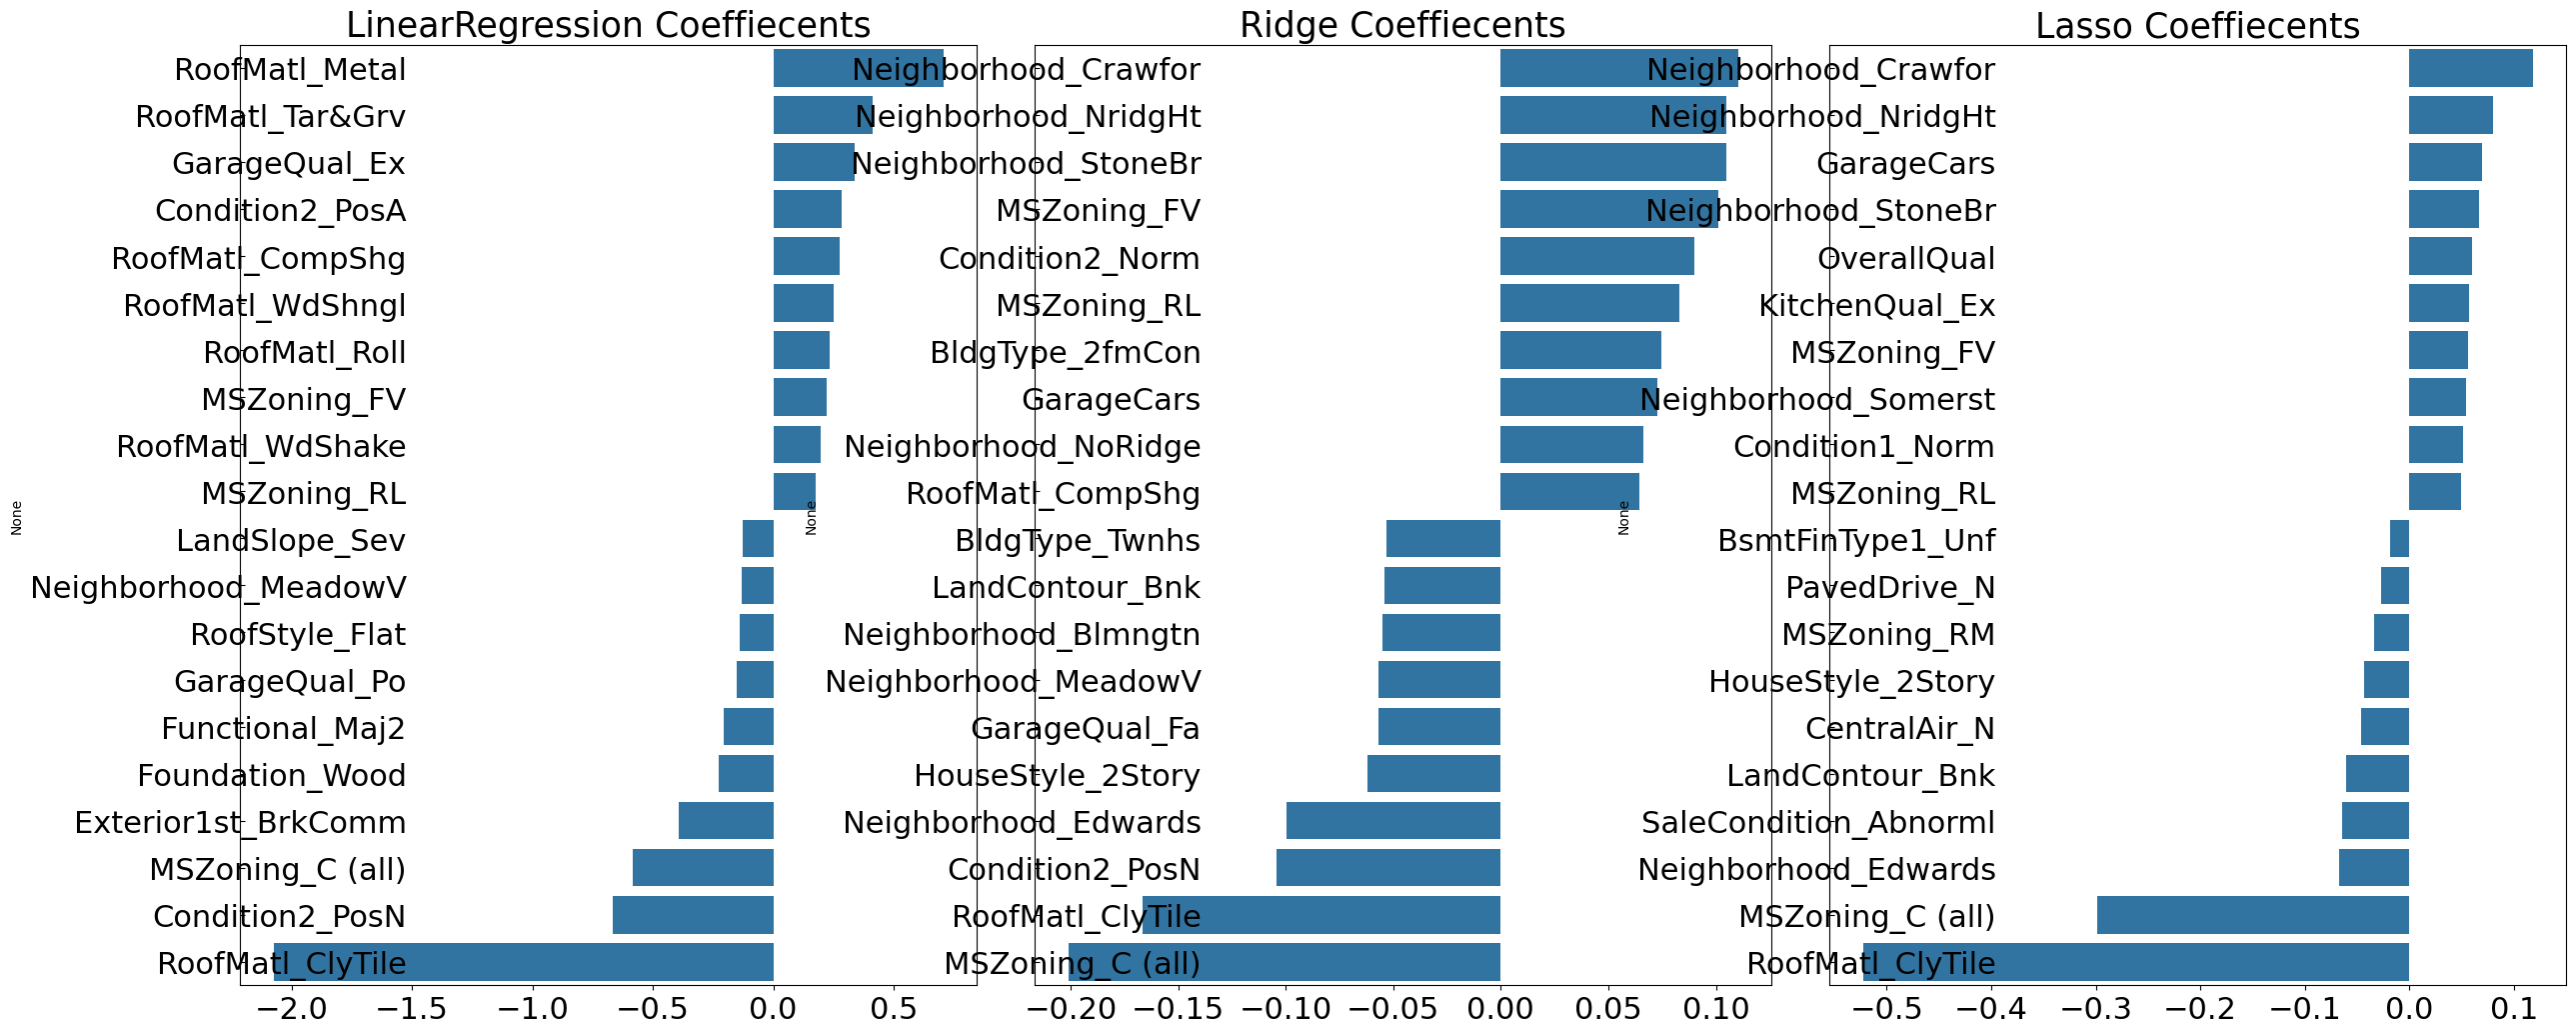

In [223]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

분석 결과 실제로 교과서 보다 RMSE가 낮게 측정됨

* LinearRegression 로그 변환된 RMSE: 0.121 (교과서 - 0.132)
* Ridge 로그 변환된 RMSE: 0.116 (교과서 - 0.124)
* Lasso 로그 변환된 RMSE: 0.112 (교과서 - 0.12)


## 피치 데이터 세트의 데이터 분포도 파악

In [224]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          22.099034
PoolArea         14.377604
LotArea          11.097791
3SsnPorch        11.040646
LowQualFinSF      9.608861
BsmtFinSF2        4.507199
KitchenAbvGr      4.488325
BsmtHalfBath      4.133732
ScreenPorch       3.976766
EnclosedPorch     3.093917
LotFrontage       2.760540
OpenPorchSF       2.454159
MasVnrArea        2.418589
BsmtFinSF1        1.881057
TotalBsmtSF       1.864686
WoodDeckSF        1.546567
1stFlrSF          1.488257
GrLivArea         1.474257
MSSubClass        1.391605
dtype: float64


In [225]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [226]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1332, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1296, 최적 alpha:{'alpha': 0.001}


## 왜곡 정도 변경 이후 RMSE가 증가??

LinearRegression 로그 변환된 RMSE: 0.124
LinearRegression 로그 변환된 MSE: 0.015
LinearRegression 로그 변환해제 RMSE: 20177.977
LinearRegression 로그 변환해제 MSE: 407150764.073
Ridge 로그 변환된 RMSE: 0.116
Ridge 로그 변환된 MSE: 0.013
Ridge 로그 변환해제 RMSE: 21542.856
Ridge 로그 변환해제 MSE: 464094629.536
Lasso 로그 변환된 RMSE: 0.111
Lasso 로그 변환된 MSE: 0.012
Lasso 로그 변환해제 RMSE: 22157.381
Lasso 로그 변환해제 MSE: 490949533.396


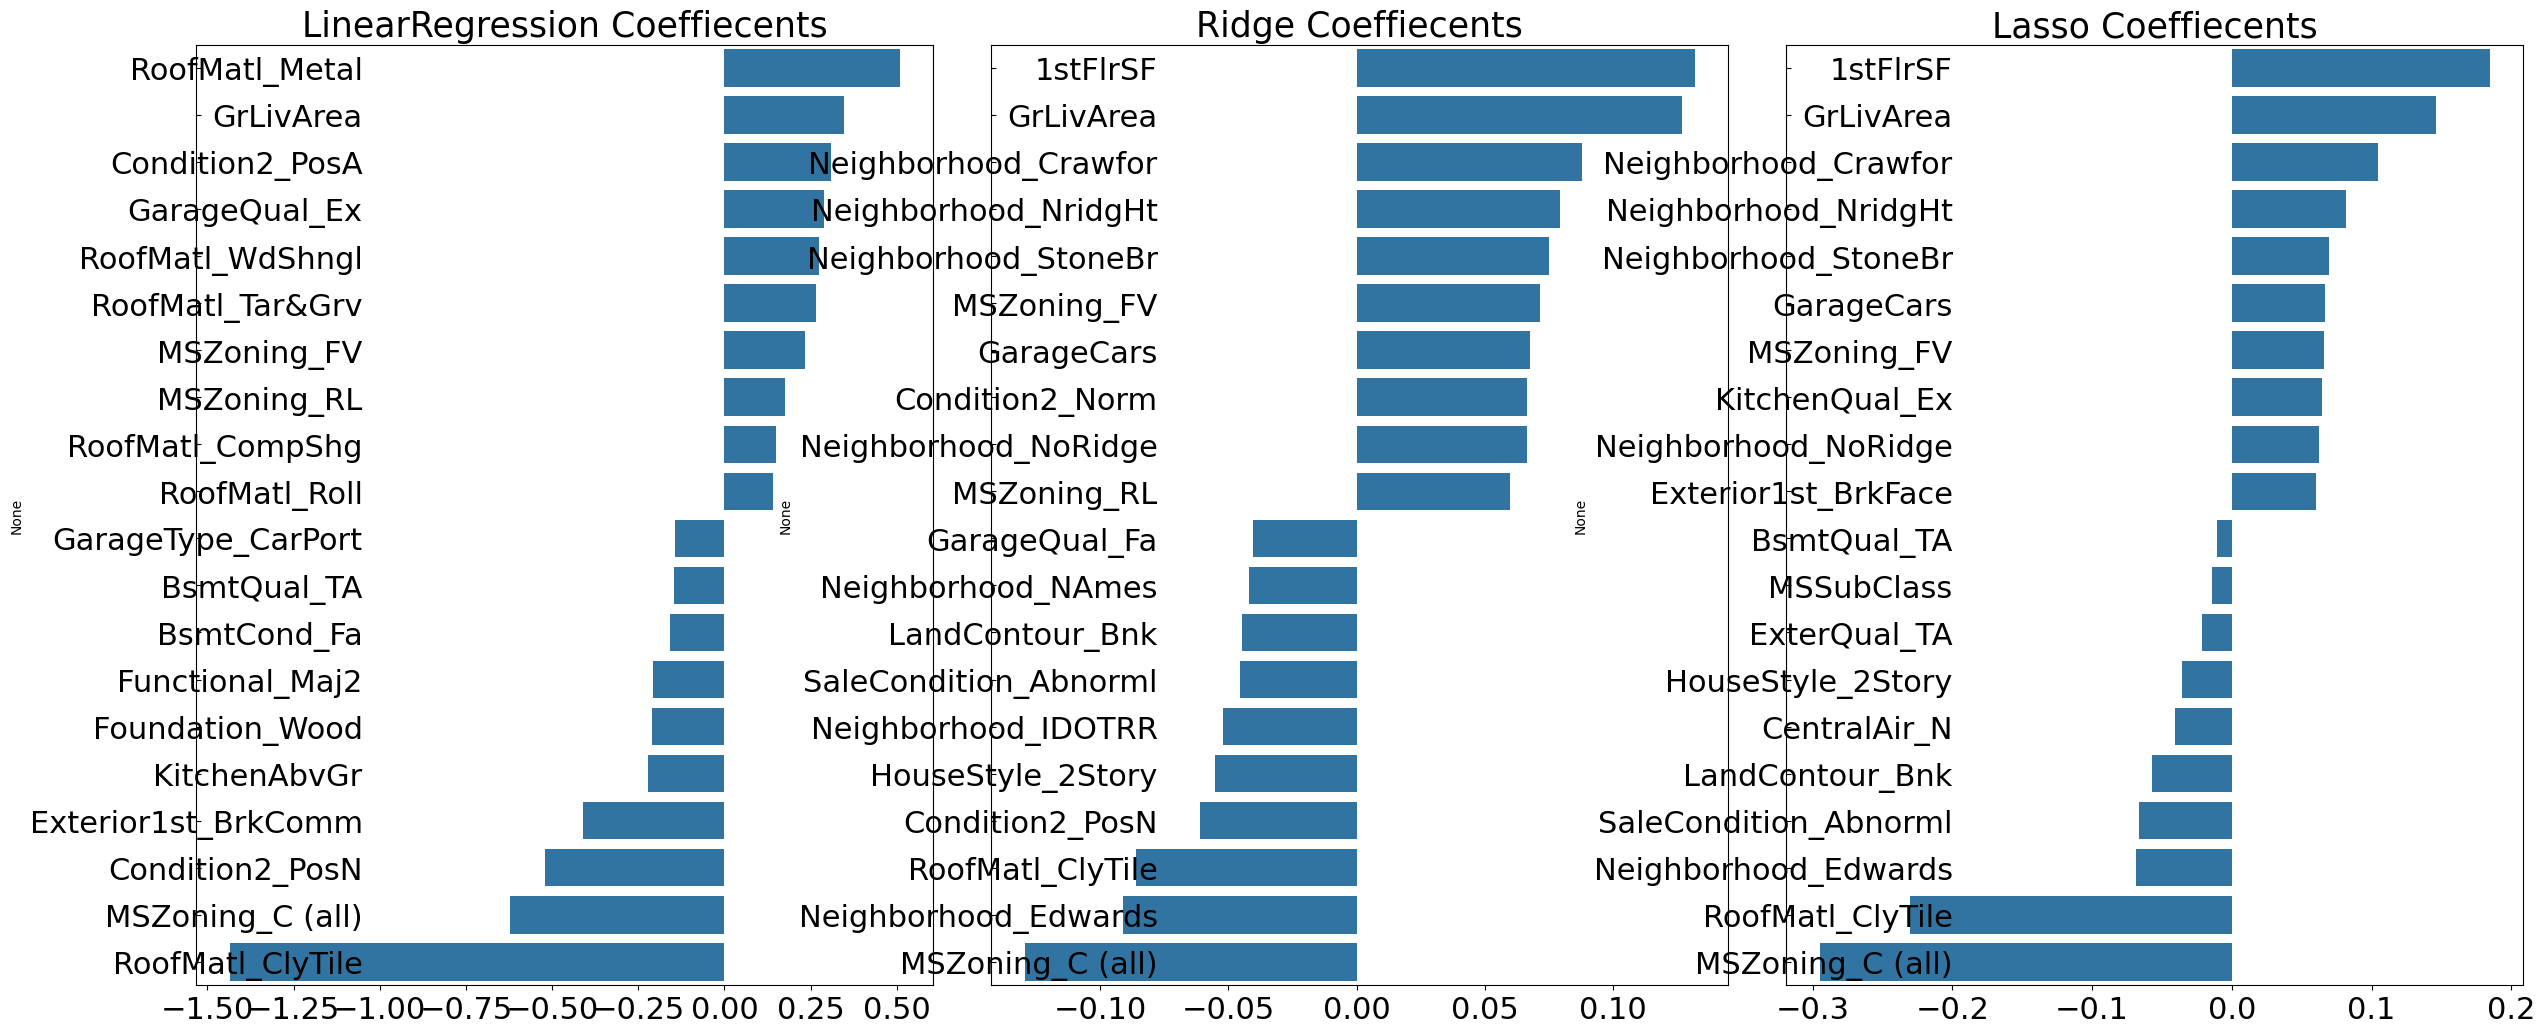

In [227]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

교과서 분석과는 조금 다르게 나왔지만 (1, 2d위 회계 계수가 뒤바뀌는 등 미세한 차이 확인) 전반적인 트렌드 및 그래프의 모양은 동일함.

## 회계 계수가 높은 피처, 즉 예측에 많은 영향을 미치는 중요 피처의 이상치 데이터의 처리가 중요함

# 1. Griv Area 의 이상치 제거

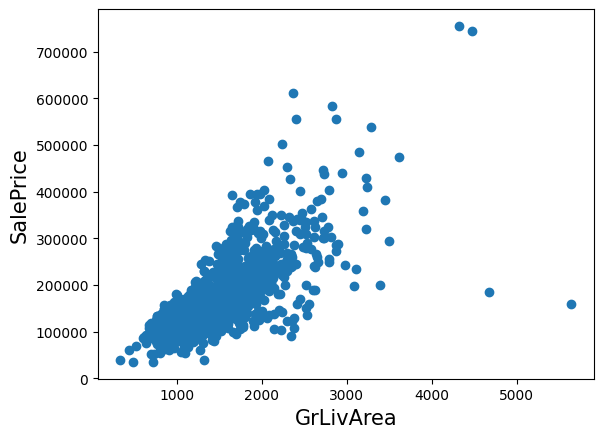

In [228]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [229]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성.
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape) #파일 바꾸기 전에 미리 한번 출력
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제.
house_df_ohe.drop(outlier_index , axis=0, inplace=True) #아웃라이어 삭제
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape) #아웃 라이어 삭제 이후 출력

아웃라이어 레코드 index : [ 64 373]
아웃라이어 삭제 전 house_df_ohe shape: (1168, 267)
아웃라이어 삭제 후 house_df_ohe shape: (1166, 267)


# 2. RoofMatl_metal 의 경우 LinearRegression 에서만 상위권에서 발견되고 Ridge, Lasso 에서는 1st 에 1stFlrSf - 이상치 visualisation 진행


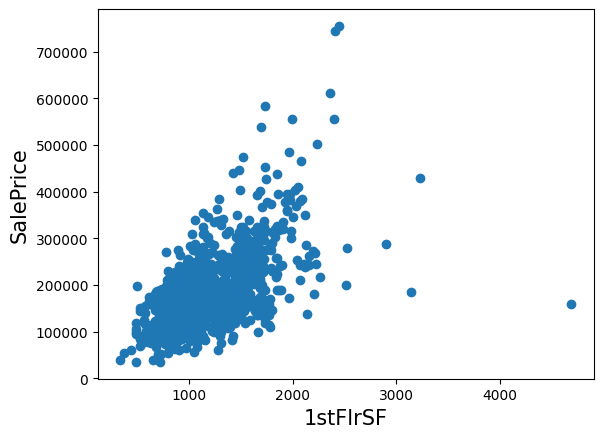

In [230]:
plt.scatter(x = house_df_org['1stFlrSF'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('1stFlrSF', fontsize=15)
plt.show()

In [231]:
# GrLivArea와 1stFlrSF 모두 로그 변환되었으므로 이를 반영한 조건 생성.
cond1 = house_df_ohe['1stFlrSF'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(400000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape) #파일 바꾸기 전에 미리 한번 출력
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제.
house_df_ohe.drop(outlier_index, axis=0, inplace=True) #아웃라이어 삭제
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape) #아웃 라이어 삭제 이후 출력

아웃라이어 레코드 index : []
아웃라이어 삭제 전 house_df_ohe shape: (1166, 267)
아웃라이어 삭제 후 house_df_ohe shape: (1166, 267)


In [232]:
# 면적 기준 상위 몇 개만 추출해보고 가격과 함께 확인
print(house_df_ohe.sort_values('1stFlrSF', ascending=False)[['1stFlrSF', 'SalePrice']].head(5))

     1stFlrSF  SalePrice
709  8.079928  12.971543
759  7.972121  12.567241
734  7.833996  12.535380
241  7.830426  12.209193
579  7.801800  13.534474


| index   | `1stFlrSF` (log) | `SalePrice` (log) | 면적 (ft²)    | 가격 (USD)        |
| ------- | ---------------- | ----------------- | ----------- | --------------- |
| 709     | 8.0799           | 12.9715           | ≈ 3,229     | ≈ 429,000       |
| 759     | 7.9721           | 12.5672           | ≈ 2,895     | ≈ 289,500       |
| 734     | 7.8340           | 12.5354           | ≈ 2,528     | ≈ 276,600       |
| **241** | **7.8304**       | **12.2092**       | **≈ 2,515** | **≈ 199,600** ❗ |
| 579     | 7.8018           | 13.5345           | ≈ 2,445     | ≈ 754,700  🔥   |




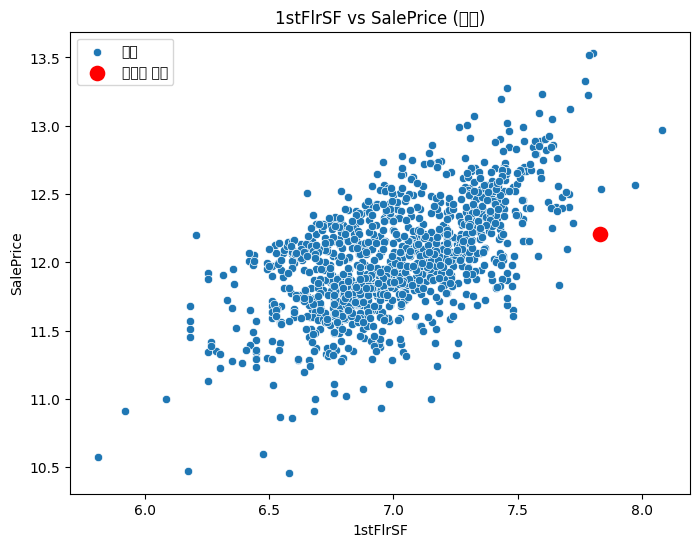

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=house_df_ohe['1stFlrSF'], y=house_df_ohe['SalePrice'], label='전체')
sns.scatterplot(x=[house_df_ohe.loc[241, '1stFlrSF']],
                y=[house_df_ohe.loc[241, 'SalePrice']],
                color='red', label='이상치 후보', s=150)
plt.title("1stFlrSF vs SalePrice (로그)")
plt.legend()
plt.show()

In [234]:
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape) #파일 바꾸기 전에 미리 한번 출력
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제.
house_df_ohe.drop(index=241, axis=0, inplace=True) #아웃라이어 삭제
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape) #아웃 라이어 삭제 이후 출력

아웃라이어 삭제 전 house_df_ohe shape: (1166, 267)
아웃라이어 삭제 후 house_df_ohe shape: (1165, 267)


## 업데이트 된 house_df_ohe를 기반으로 릿지와 라쏘 모델의 최적화 수행 및 결과 출력

In [235]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1146, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.113, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.106
LinearRegression 로그 변환된 MSE: 0.011
LinearRegression 로그 변환해제 RMSE: 16891.89
LinearRegression 로그 변환해제 MSE: 285335934.025
Ridge 로그 변환된 RMSE: 0.114
Ridge 로그 변환된 MSE: 0.013
Ridge 로그 변환해제 RMSE: 17718.336
Ridge 로그 변환해제 MSE: 313939417.66
Lasso 로그 변환된 RMSE: 0.11
Lasso 로그 변환된 MSE: 0.012
Lasso 로그 변환해제 RMSE: 17619.763
Lasso 로그 변환해제 MSE: 310456064.415


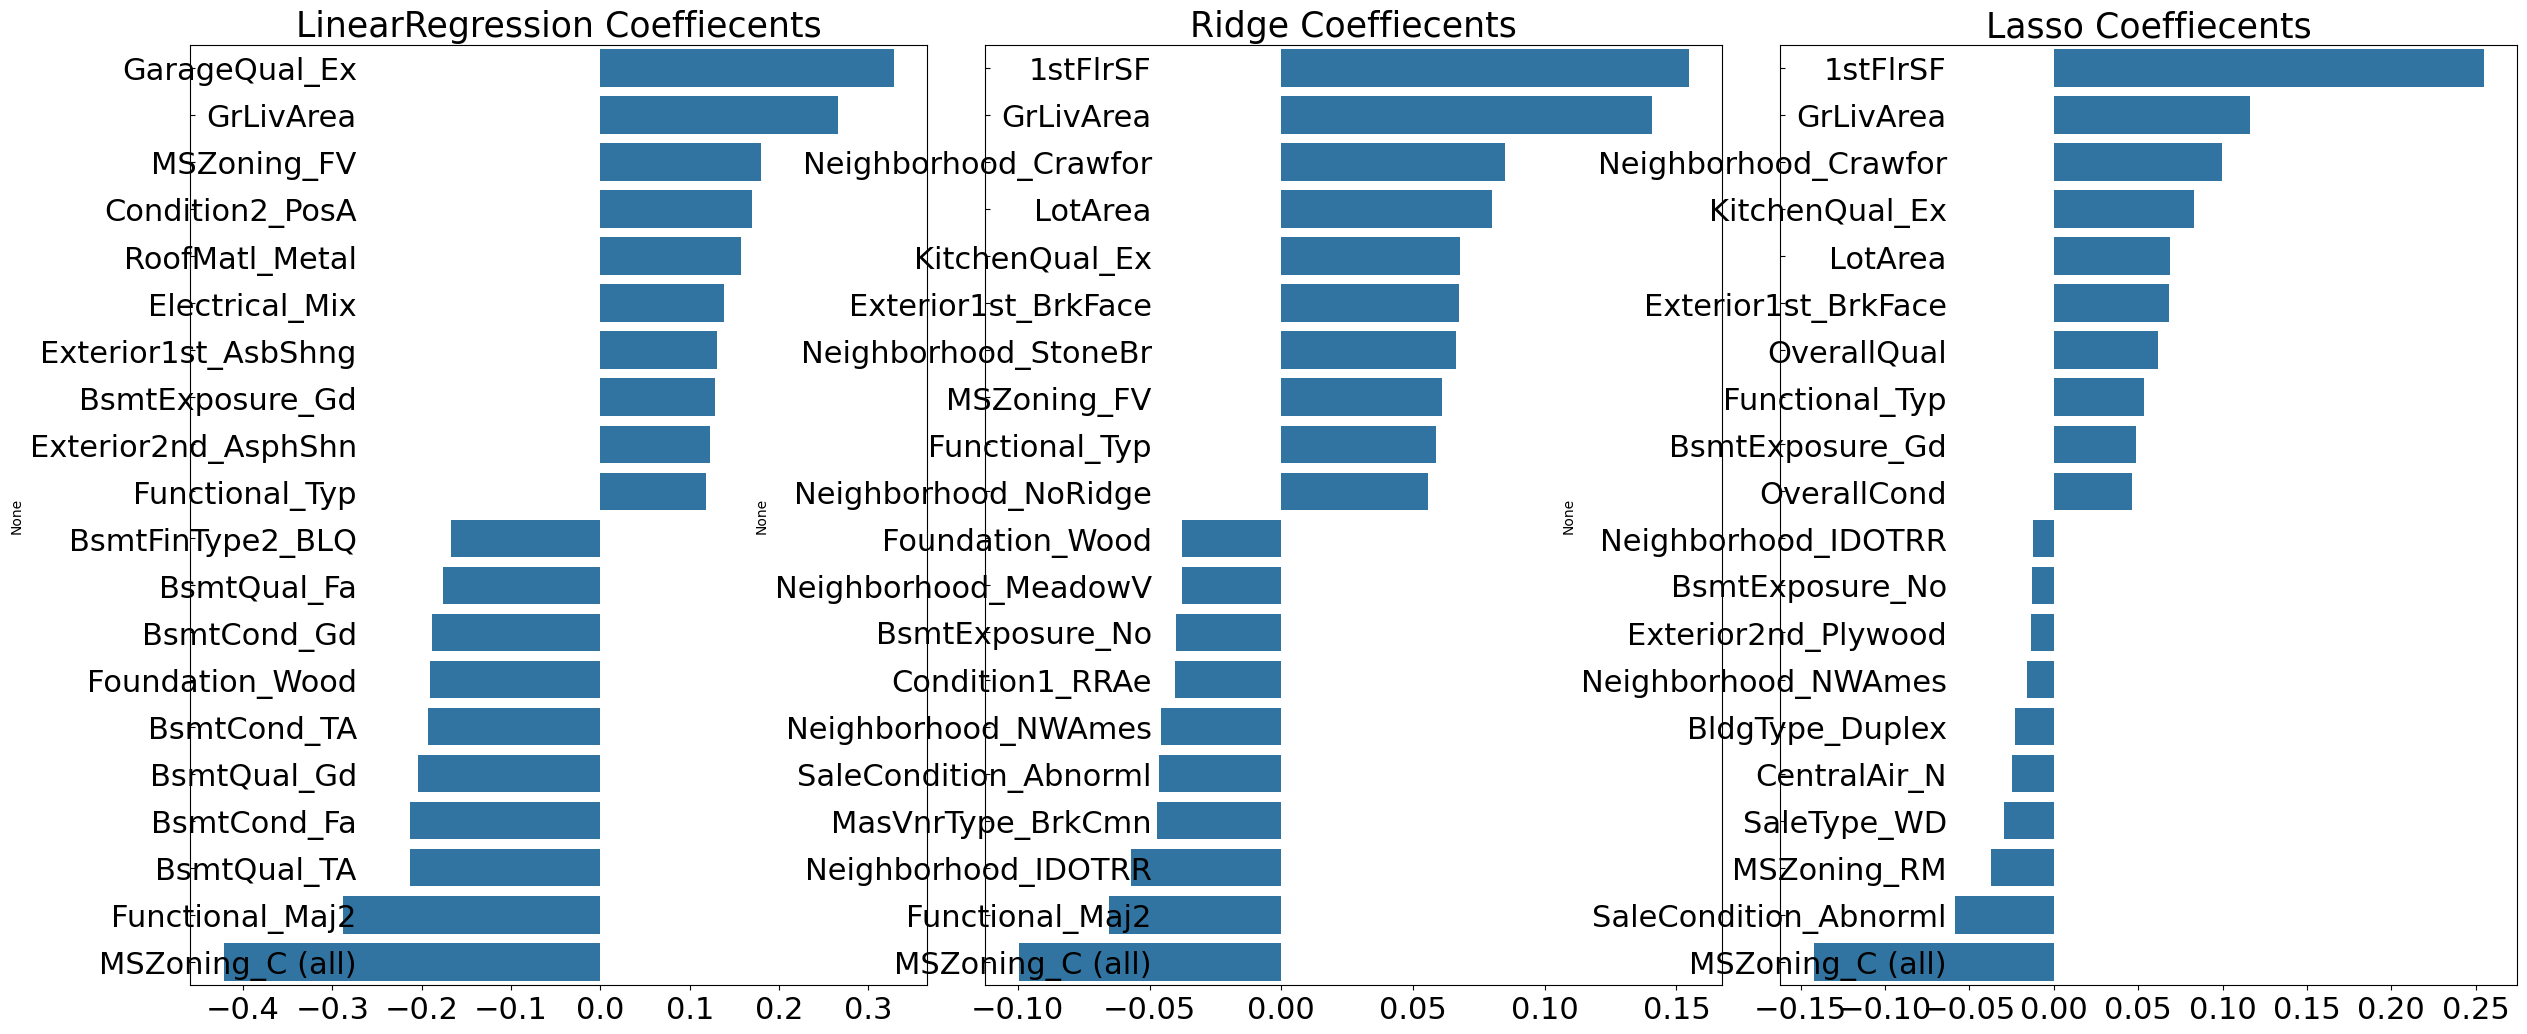

In [236]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [237]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]} #탐색할 파라미터 설정
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)

# xgb_reg = XGBRegressor(
#     n_estimators=1000,       # 트리 개수 (기본보다 많음, 충분히 학습할 수 있게 설정)
#     learning_rate=0.05,      # 학습률 (작을수록 더 천천히, 안정적으로 학습)
#     colsample_bytree=0.5,    # 각 트리에서 사용할 피처 비율 (과적합 방지용)
#     subsample=0.8            # 각 트리에서 사용할 샘플 비율 (과적합 방지용)
# )

best_xgb = print_best_params(xgb_reg, xgb_params)
# 위에서 정의한 모델을 print_best_params() 함수에 전달하여 학습 및 평가 진행

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1242, 최적 alpha:{'n_estimators': 1000}


In [238]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2942
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 164
[LightGBM] [Info] Start training from score 12.020373
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2922
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 156
[LightGBM] [Info] Start training from score 12.025506
[LightGBM] [Warning] Found w

# 성능 평가

## 1. 검정 데이터에 대한 평가 지표가 명확하게 제시되었는가?
## 2. 평가 지표가 타당하며, 모델 성능을 잘 반영하는가?
## 3. 하이퍼파라미터 튜닝(실험)을 진행하고, 결과를 기록했는가 (심화)?

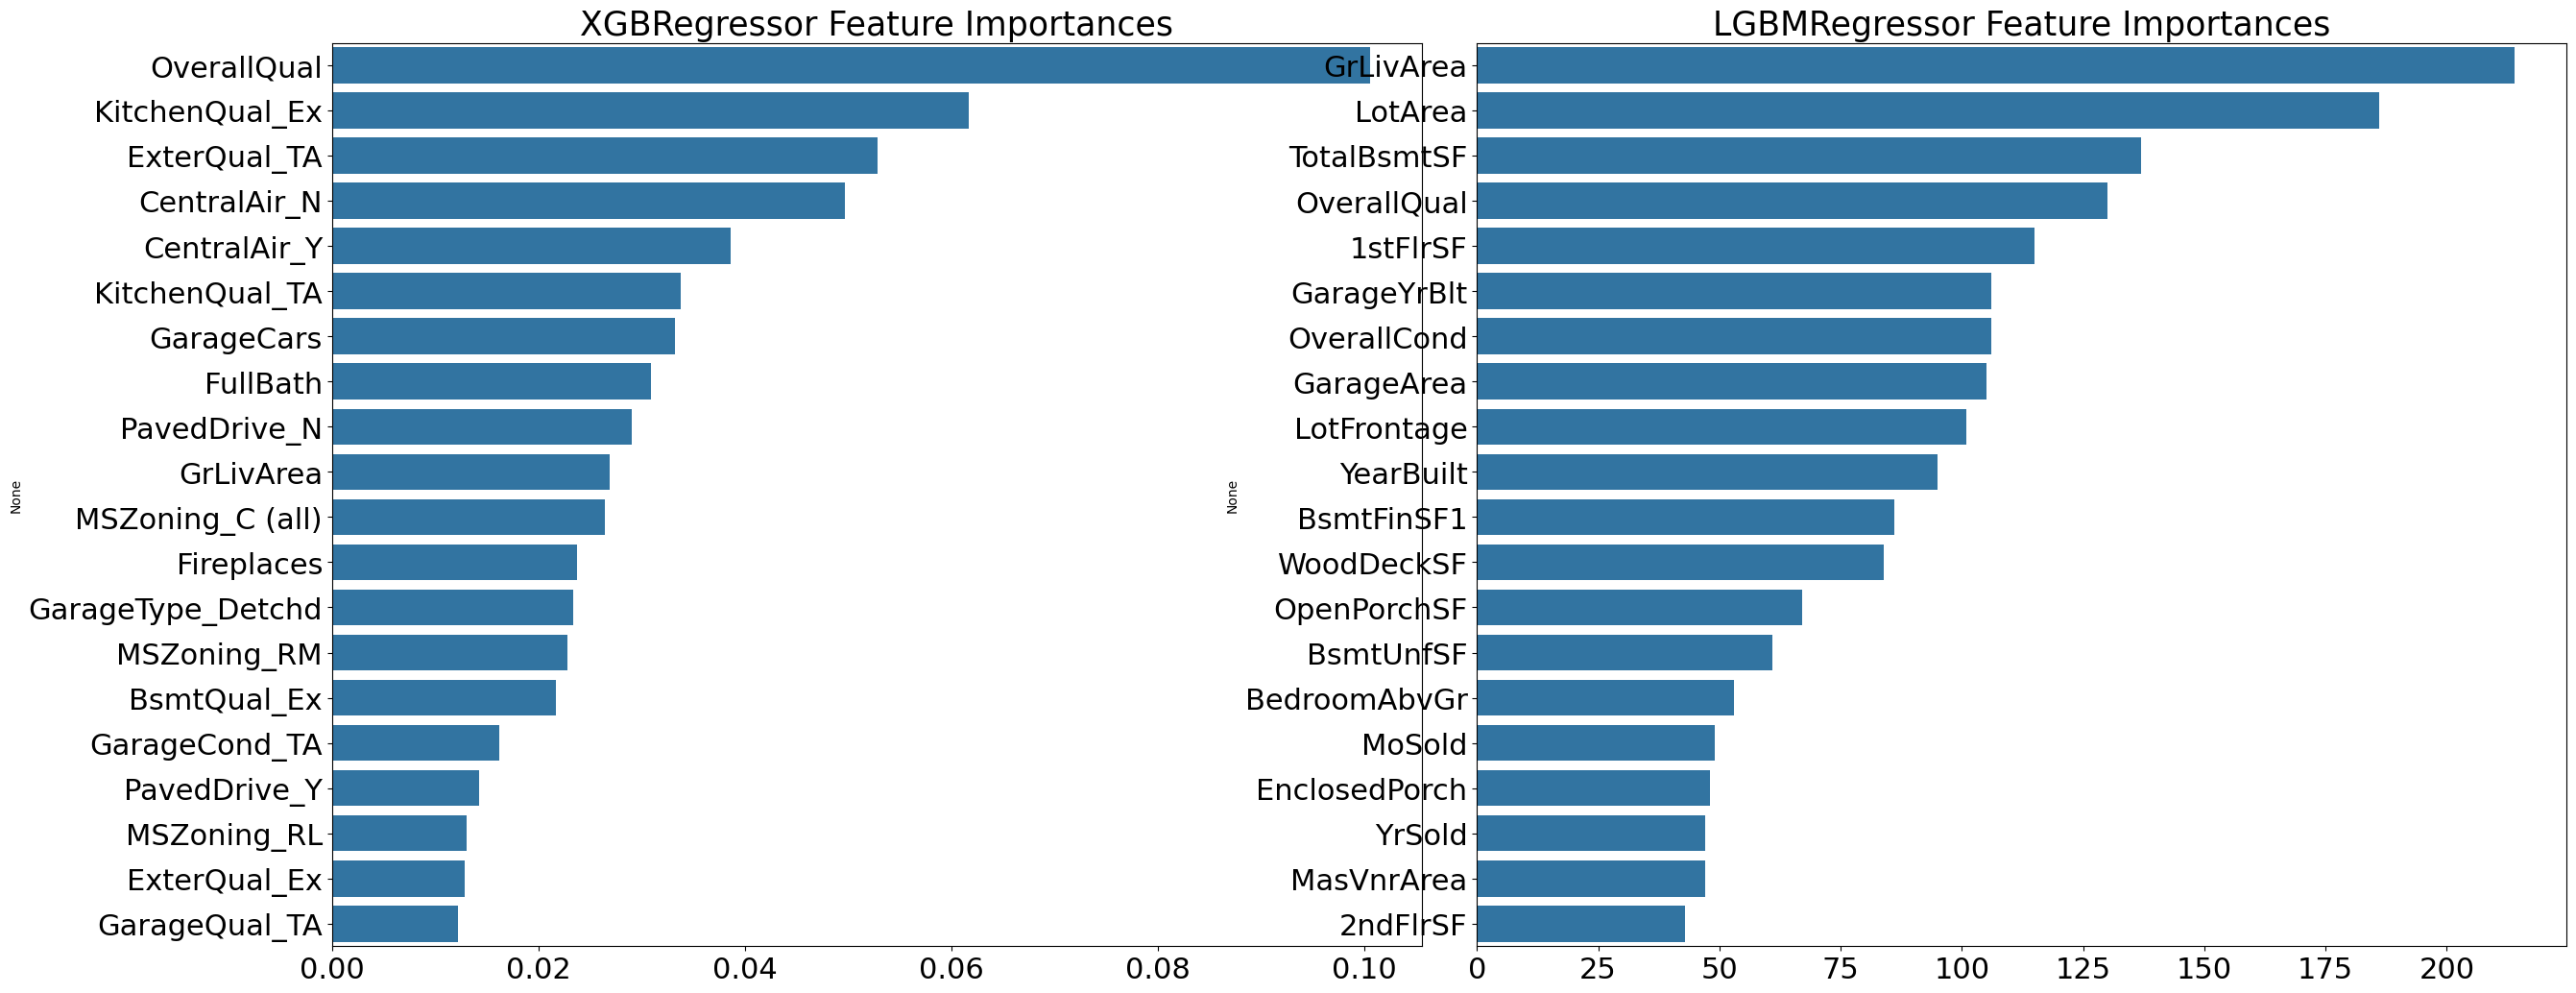

In [239]:
 # 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화.
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [240]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.11012090313024912
Ridge 모델의 RMSE: 0.11378885325649317
Lasso 모델의 RMSE: 0.10951358522098925


In [241]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}

get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2931
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 154
[LightGBM] [Info] Start training from score 12.021930
최종 혼합 모델의 RMSE: 0.12286633746302297
XGBM 모델의 RMSE: 0.12843830272548298
LGBM 모델의 RMSE: 0.12373494577509002


# 스태킹 앙상블
- 모델을 여러개 돌리고, 그걸 바탕으로 모델을 하나 더 만드는 기법  

In [242]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [243]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환.
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2685
[LightGBM] [Info] Number of data points in the train set: 745, number of used features: 146
[LightGBM] [Info] Start training from score 12.036780
	 폴드 세트:  1  시작 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

In [244]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.
Stack_final_X_train = np.concatenate((ridge_train, lasso_train,
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test,
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용.
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.11065616998128049


# 제출용 Test 데이터 전처리 진행

### train에 진행된 전처리
- NUll 많은 컬럼 삭제
- skew 컬럼 로그 변환
- 원핫 인코딩

결과값의 컬럼 개수가 266개여야한다

또 test와 train의 원핫인코딩 이후 개수가 달라지는 현상이 발생하게되는데

이때는 값이 너무 많아서
```
test_ohe1 = pd.get_dummies(test)
test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)
```
이런 방식으로 train과 열 개수를 맞춰주는 방식을 사용해봄
- 다른 방식을 사용해보셔도 좋습니다~

In [245]:
X_train.shape

(932, 266)

In [247]:
## test_data를 받아오기
test = pd.read_csv('./test.csv')

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
test.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)

num_cols = test.select_dtypes(include=['number']).columns
test[num_cols] = test[num_cols].fillna(test[num_cols].mean())
test_ohe1 = pd.get_dummies(test)
test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)

# 편향 전처리 진행
test_ohe2[skew_features_top.index] = np.log1p(test_ohe2[skew_features_top.index])
test_ohe2 = pd.get_dummies(test_ohe2)

test_ohe2.shape

(292, 266)

#[하이퍼 파라미터 튜닝]
* 가장 값이 잘 나온 스태킹 모델을 하이퍼 파라미터 튜닝


In [248]:
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 기반 모델 학습
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                         colsample_bytree=0.5, subsample=0.8)
xgb_model.fit(X_train, y_train)

lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.05,
                           colsample_bytree=0.5, subsample=0.8)
lgbm_model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2931
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 154
[LightGBM] [Info] Start training from score 12.021930


LGBMRegressor(colsample_bytree=0.5, learning_rate=0.05, n_estimators=1000,
              subsample=0.8)

# Stacking 모델 채택

In [250]:
# ✅ (1) 전체 테스트셋 기반으로 개별 모델 예측
ridge_test_full = ridge_model.predict(test_ohe2)
lasso_test_full = lasso_model.predict(test_ohe2)
xgb_test_full   = xgb_model.predict(test_ohe2)
lgbm_test_full  = lgbm_model.predict(test_ohe2)

# ✅ (2) stacking 입력 생성
test_stack_input = np.concatenate([
    ridge_test_full.reshape(-1, 1),
    lasso_test_full.reshape(-1, 1),
    xgb_test_full.reshape(-1, 1),
    lgbm_test_full.reshape(-1, 1)
], axis=1)

# ✅ (3) stacking 메타모델로 예측 (로그 스케일)
final_pred_log = best_model.predict(test_stack_input)
# ✅ (1) 로그 상태의 예측값을 복원 ->
final_pred_exp = np.expm1(final_pred_log)

In [251]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# ✅ (1) 최종 메타모델 정의 및 학습
meta_model_lasso = Lasso(alpha=0.0005)
meta_model_lasso.fit(Stack_final_X_train, y_train)

# ✅ (2) 검증셋 예측
final = meta_model_lasso.predict(Stack_final_X_test)

# ✅ (3) RMSE 계산 (로그 스케일 상태)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)

# ✅ (4) 결과 출력
print("스태킹 회귀 모델의 최종 RMSE 값은:", round(rmse, 4))

스태킹 회귀 모델의 최종 RMSE 값은: 0.1107


In [252]:
## sample_data를 받아오기
sample = pd.read_csv('./sample_submission.csv')

# SalePrice 가 0으로 차있는 sample
sample

,Id,SalePrice
0,86,0
1,227,0
2,492,0
3,64,0
4,576,0
...,...,...
287,1271,0
288,903,0
289,1019,0
290,312,0


In [253]:

# (4) sample_submission에 넣기
sample = pd.read_csv("sample_submission.csv")
sample["SalePrice"] = final_pred_exp
print("예측값 개수:", final_pred_exp.shape)        # ✅ (292,)
print("sample 행 개수:", sample.shape[0])           # ✅ (292,)

예측값 개수: (292,)
sample 행 개수: 292


In [254]:
# 제출부분과 크기가 맞는지 확인
sample.shape

(292, 2)

In [255]:
pred_exp

array([128912.85688811, 314167.87281138, 147718.01111855, 252431.33640867,
       160226.08460488, 132265.83285136,  89679.99742098, 143660.52380416,
       196787.28532375, 111279.83542751, 136213.46232518, 246224.11653582,
       135646.28622388, 160658.86666677, 266587.3276007 , 142977.71296753,
       143813.77905673, 233220.50541569, 204333.00554387, 138068.72274376,
       160602.56994015, 181686.31488729,  99863.85604935,  91066.04604969,
       200303.08072793,  93102.80783515, 226677.61829532, 146028.96059339,
       104557.08560618, 191542.52079015, 130384.02580778, 105410.36315039,
       120071.13841715, 194389.17792353, 172596.80111796, 131119.77300107,
       221829.58014187, 228946.34142987, 244637.84345712, 123269.87096716,
       157400.61726405, 259371.7538809 ,  79063.032118  , 124631.47971225,
       237684.49621257,  80530.36150815, 172785.72096447, 147723.79122053,
       356475.11051455, 125186.57987108, 119543.41423123, 141668.96019642,
       134511.61210716, 2

In [256]:
# (5) 저장
sample.to_csv("submission1.csv", index=False)
print("✅ submission.csv 저장 완료!")

✅ submission.csv 저장 완료!


주택의 각 항목(특징 또는 변수)을 바탕으로 주택 가격을 예측하는 모델링 작업은 회귀 분석의 대표적인 예제 중 하나입니다. 이를 위해 다음과 같은 과정을 체계적으로 진행할 수 있습니다:

✅ 1. 데이터 구성 및 전처리
입력 변수 (독립 변수): 면적, 방 개수, 욕실 개수, 위치(지역), 건축 연도, 주차 공간, 층 수 등

목표 변수 (종속 변수): 주택 가격

전처리 항목:
결측치 처리

범주형 변수 인코딩 (예: 지역 -> One-Hot Encoding)

이상치 처리 (예: log 변환, z-score 제거 등)

스케일링 (예: StandardScaler, MinMaxScaler)

✅ 2. 탐색적 데이터 분석 (EDA)
각 변수와 주택 가격 간의 상관관계 확인

히스토그램, 박스플롯, 산점도 등 시각화 활용

중요한 피처 추출 또는 불필요한 변수 제거

✅ 3. 모델링
기본 모델:
선형 회귀 (Linear Regression)

릿지 / 라쏘 / 엘라스틱넷 회귀 (Regularization 기법 포함)

비선형 또는 고성능 모델:
트리 기반 모델: Random Forest, XGBoost, LightGBM

앙상블: 스태킹, 배깅, 부스팅

✅ 4. 모델 평가
교차 검증 (Cross-validation)

RMSE, MAE, R² 등 회귀 성능 지표 활용

실제 vs 예측 가격 비교

✅ 5. 모델 개선 및 튜닝
피처 엔지니어링 (예: 면적당 가격, 연식 대비 가격 등 새로운 변수 생성)

하이퍼파라미터 튜닝 (GridSearchCV, RandomizedSearchCV)

중요 변수 시각화 및 해석 (특히 트리 기반 모델에서는 feature_importances_ 유용)

예시 목표:
"서울의 아파트 정보를 바탕으로 방 개수, 면적, 위치 등을 고려해 아파트 가격을 예측하는 모델 개발"

